In [ ]:
#Random Forest Regression

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [4]:
from sklearn.ensemble import RandomForestRegressor

rft = RandomForestRegressor()
rft.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
y_pred = rft.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

42.810449438202255

In [8]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.39757143715560533

In [10]:
rft.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1238561004),
 DecisionTreeRegressor(max_features=1.0, random_state=93315666),
 DecisionTreeRegressor(max_features=1.0, random_state=1478438617),
 DecisionTreeRegressor(max_features=1.0, random_state=64907962),
 DecisionTreeRegressor(max_features=1.0, random_state=1920198068),
 DecisionTreeRegressor(max_features=1.0, random_state=158949851),
 DecisionTreeRegressor(max_features=1.0, random_state=2010592264),
 DecisionTreeRegressor(max_features=1.0, random_state=135870981),
 DecisionTreeRegressor(max_features=1.0, random_state=1592732398),
 DecisionTreeRegressor(max_features=1.0, random_state=1396738313),
 DecisionTreeRegressor(max_features=1.0, random_state=954271813),
 DecisionTreeRegressor(max_features=1.0, random_state=313696653),
 DecisionTreeRegressor(max_features=1.0, random_state=1903372828),
 DecisionTreeRegressor(max_features=1.0, random_state=231243168),
 DecisionTreeRegressor(max_features=1.0, random_state=1582353200),
 Dec

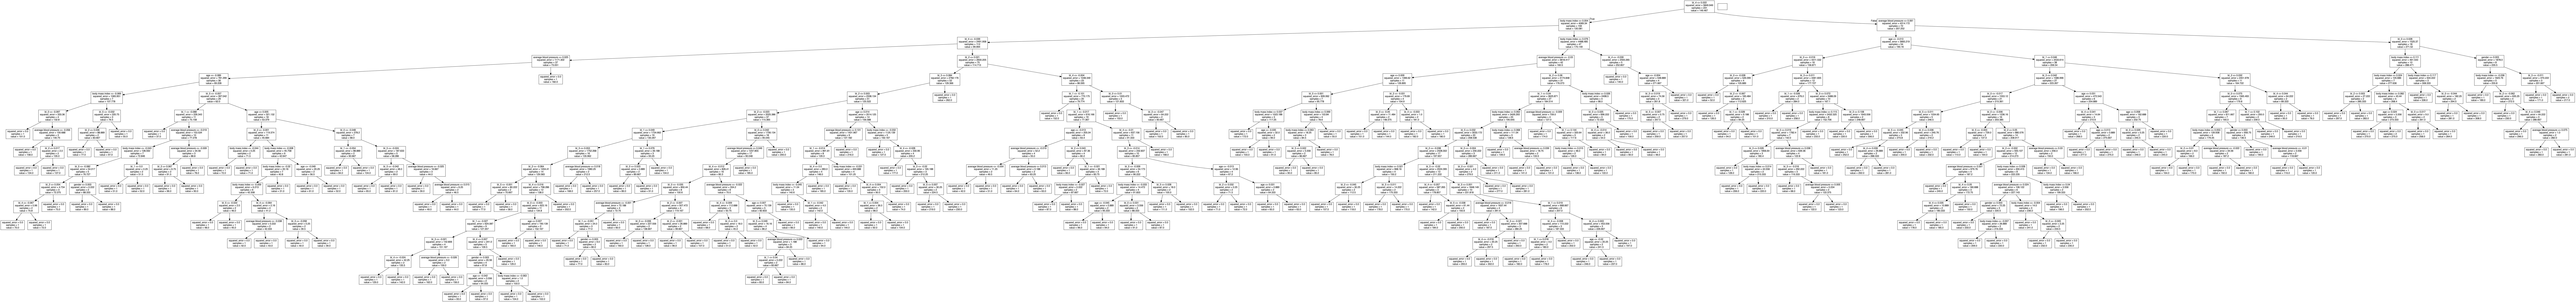

In [14]:
import numpy as np
from sklearn import tree
from io import StringIO  # Use StringIO from the io module
import pydotplus  # Use pydotplus instead of pydot
from IPython.display import Image

# Assuming rft is your trained RandomForestRegressor or RandomForestClassifier
# and X_feature_names contains the feature names

dot_diabetes = StringIO()
tree.export_graphviz(rft.estimators_[0], out_file=dot_diabetes, feature_names=X_feature_names)
graph = pydotplus.graph_from_dot_data(dot_diabetes.getvalue())

# Display the graph as an image
Image(graph.create_png())


In [16]:
rft.feature_importances_

array([0.05771085, 0.01219374, 0.29636299, 0.1020946 , 0.04535591,
       0.04841029, 0.06513608, 0.02002918, 0.29092354, 0.06178283])

[Text(0, 0, 'age'),
 Text(1, 0, 'gender'),
 Text(2, 0, 'body mass index'),
 Text(3, 0, 'average blood pressure'),
 Text(4, 0, 'bl_0'),
 Text(5, 0, 'bl_1'),
 Text(6, 0, 'bl_2'),
 Text(7, 0, 'bl_3'),
 Text(8, 0, 'bl_4'),
 Text(9, 0, 'bl_5')]

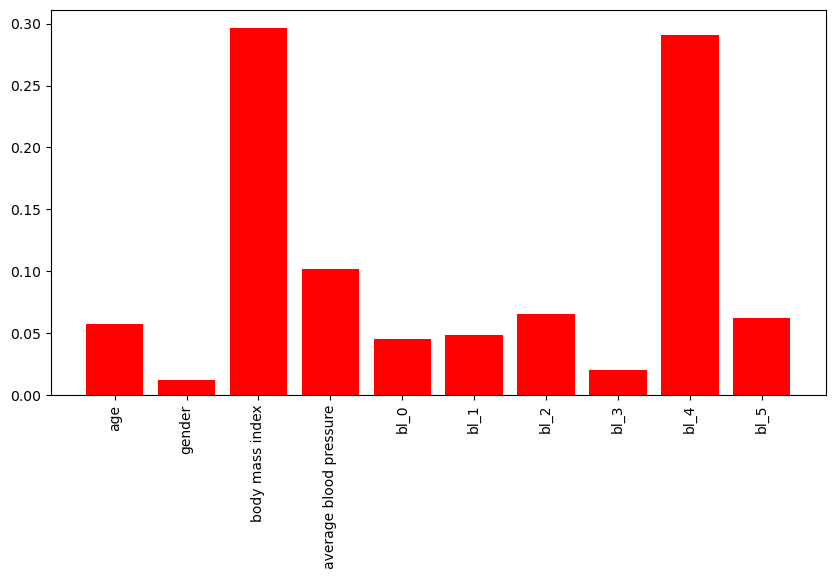

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

bar_rects = ax.bar(np.arange(10), rft.feature_importances_,color='r',align='center')
ax.xaxis.set_ticks(np.arange(10))
ax.set_xticklabels(X_feature_names, rotation='vertical')